In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'listings.csv', usecols = ['room_type', 'price'])

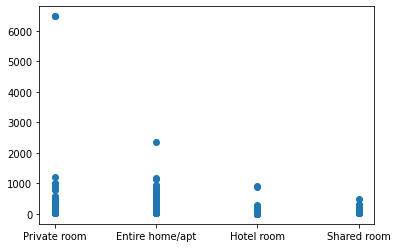

In [5]:
plt.scatter(df.room_type, df.price)

plt.show()

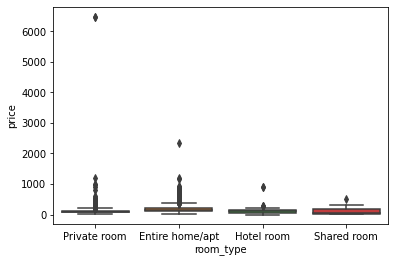

In [6]:
sns.boxplot(y='price', x='room_type', data = df) # boxplot serve para observar outliers com mais clareza
plt.show()

#essas barras são os limites superioes e inferiores da amostra

In [8]:
def remove_outlier(df): #def é uma função
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)

    df_final = df[~(LI | LS)]
    return df_final

In [9]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)

In [10]:
df_removido

,price
0,59
1,106
2,135
3,75
4,55
...,...
5591,52
5592,128
5593,100
5595,60


In [11]:
ind_dif = df.index.difference(df_removido.index) # compara os indices do dataframe com outliers e o sem outlier e retorna
# a difença para o ind_dif

In [12]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

In [15]:
media_price = df.price.mean()
print(media_price)

163.92871180989815


In [16]:
for i in range(0, len(ind_dif), 1):
    df.loc[ind_dif[i], 'price'] = media_price
    

In [17]:
ind_dif[0]

38

In [18]:
df.head(39)

,room_type,price
0,Private room,59.000000
1,Private room,106.000000
2,Private room,135.000000
3,Private room,75.000000
4,Private room,55.000000
5,Entire home/apt,240.000000
6,Entire home/apt,160.000000
7,Entire home/apt,250.000000
8,Private room,118.000000
9,Entire home/apt,222.000000


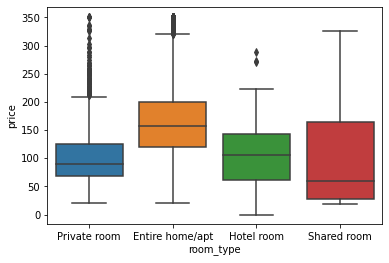

In [19]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()